In [1]:
%matplotlib inline
import os
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import seaborn as sns
# from cdo import *
# cdo = Cdo()

from LinearRegression import linear_regression

data_GHCNv4   = '/work/mh0033/m301036/LSAT/Data/gistemp250_GHCNv4.nc'
data_CRUTEMP  = '/work/mh0033/m301036/LSAT/Data/CRUTEM.5.0.1.0.anomalies.nc'
data_MLOST    = '/work/mh0033/m301036/LSAT/Data/air.mon.anom.nc'
# data_NOAA     = '/work/mh0033/m301036/LSAT/Data/air.mon.anom.RG.nc'
data_Berkely  = '/work/mh0033/m301036/LSAT/Data/Complete_TAVG_LatLong1.nc'
data_GISSTEMP = '/work/mh0033/m301036/LSAT/Data/air.2x2.250.mon.anom.land.nc'

In [2]:
#Using dateTime to select key period
tas_GISS    = xr.open_dataset(data_GISSTEMP)
tas_CRUTEMP = xr.open_dataset(data_CRUTEMP) 
tas_MLOST   = xr.open_dataset(data_MLOST,decode_times=False)
units, reference_data = tas_MLOST.time.attrs['units'].split('since')
display(tas_MLOST.time)

tas_GHCNv4  = xr.open_dataset(data_GHCNv4)
tas_CRUTEMP = tas_CRUTEMP.astype(np.float64)
tas_GHCNv4  = tas_GHCNv4.astype(np.float64)
# display(tas_GISS)
# display(tas_CRUTEMP)
# display(tas_MLOST)
# display(tas_GHCNv4)

tas_CRUTEMP = tas_CRUTEMP-273.15
tas_GHCNv4  = tas_GHCNv4-273.15
# tas_MLOST_sel = tas_MLOST_sel-273.15

<xarray.DataArray 'time' (time: 2079)>
array([18262., 18293., 18321., ..., 81449., 81480., 81508.])
Coordinates:
  * time     (time) float64 1.826e+04 1.829e+04 ... 8.148e+04 8.151e+04
Attributes:
    units:                  days since 1800-1-1 00:00:0.0
    long_name:              Time
    delta_t:                0000-01-00 00:00:00
    avg_period:             0000-01-00 00:00:00
    standard_name:          time
    axis:                   T
    coordinate_defines:     start
    bounds:                 time_bnds
    calendar:               gregorian
    coverage_content_type:  coordinate
    actual_range:           [18262. 81508.]

In [12]:
tas_CRUTEMP

<xarray.Dataset>
Dimensions:         (time: 2078, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2023-02-15
  * latitude        (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude       (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds
Data variables:
    tas             (time, latitude, longitude) float64 nan nan nan ... nan nan
    time_bnds       (time, bnds) float64 -3.787e+18 -3.784e+18 ... 1.678e+18
    latitude_bnds   (latitude, bnds) float64 -363.1 -358.1 ... -188.1 -183.1
    longitude_bnds  (longitude, bnds) float64 -453.1 -448.1 ... -98.15 -93.15
Attributes:
    comment:      CRUTEM5 air temperature at 2m
    history:      Data set built at: 2023-04-13T10:37:48+00:00
    institution:  Climatic Research Unit, University of East Anglia/Met Offic...
    licence:      CRUTEM5 is licensed under the Open Government Licence v3.0 ...
    reference:    Osborn, T. J., P. D. Jones, D. H. Lister, C. P. Morice, I. ...
    source:       
    title:        CRUTEM5 air temperature over land
    version:      CRUTEM.5.0.1.0
    Conventions:  CF-1.7

In [13]:
tas_GISS

<xarray.Dataset>
Dimensions:  (lat: 90, lon: 180, time: 1719)
Coordinates:
  * lat      (lat) float32 89.0 87.0 85.0 83.0 81.0 ... -83.0 -85.0 -87.0 -89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2023-03-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          GISS Surface Temperature Analysis (GISTEMP): 250km smooth...
    comments:       GISS Surface Temperature Analysis (GISTEMP): 250km smooth...
    platform:       Analysis
    Source:         http://data.giss.nasa.gov/gistemp/ source and http://data...
    Documentation:  http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    Conventions:    COARDS
    history:        created at PSD Jun 2009 by CAS. Converted to chunked, def...
    dataset_title:  GISS Surface Temperature Analysis
    References:     https://www.psl.noaa.gov/data/gridded/data.gistemp.html
    update_date:    04/2023
    data_modified:  2023-04-13

In [3]:
# tas_MLOST.time[0].data

In [4]:
# def create_datetime(days, start_date):
#     return np.timedelta64(int(days), 'D') + np.datetime64(start_date)

# create_datetime_vec = np.vectorize(create_datetime)
# create_datetime_vec(tas_MLOST.time.data, np.repeat('1800-01-01',tas_MLOST.time.size))

In [5]:
tas_MLOST_recon = pd.to_datetime(tas_MLOST.time.data, unit='D', origin=pd.Timestamp('1800-01-01'))
tas_MLOST_recon

DatetimeIndex(['1850-01-01', '1850-02-01', '1850-03-01', '1850-04-01',
               '1850-05-01', '1850-06-01', '1850-07-01', '1850-08-01',
               '1850-09-01', '1850-10-01',
               ...
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01'],
              dtype='datetime64[ns]', length=2079, freq=None)

In [14]:
tas_MLOST = tas_MLOST.assign_coords({"time":(tas_MLOST_recon)})
tas_MLOST

<xarray.Dataset>
Dimensions:    (lat: 36, lon: 72, time: 2079, nbnds: 2)
Coordinates:
  * lat        (lat) float32 -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon        (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * time       (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2023-03-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    air        (time, lat, lon) float32 ...
Attributes: (12/22)
    Conventions:           CF-1.0
    dataset_title:         NOAA Global Surface Temperature (NOAAGlobalTemp)
    keywords_vocabulary:   Climate and Forecast (CF) Standard Name Table (Ver...
    keywords:              Earth Science > Oceans > Ocean Temperature > Sea S...
    cdm_data_type:         Grid
    dataset_citation_url:  https://doi.org/10.25921/9qth-2p70
    ...                    ...
    References:            https://www.psl.noaa.gov/data/gridded/data.noaaglo...
    version:               V5.1
    comment:               Merged land ocean surface temperature anomalies. V...
    history:               Updated from V5.0 to V5.1 Feb 2023 using data from...
    Source:                https://www.ncei.noaa.gov/data/noaa-global-surface...
    data_modified:         2023-04-18

In [10]:
#Land only dataset
land_sea_mask=xr.open_dataset('/home/m/m301036/josie/LSAT/lsmask.nc')
display(land_sea_mask)
land_sea_mask.coords

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, time: 1)
Coordinates:
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * time     (time) datetime64[ns] 2000-01-01
Data variables:
    lsmask   (time, lat, lon) float32 ...
Attributes:
    platform:       Surface
    title:          NOAA Merged Land-Ocean Surface Temperature Analysis
    Conventions:    CF-1.0
    References:     http://www.psl.noaa.gov/data/gridded/data.noaaglobaltemp....
    Source:         ftp ftp://ftp.ncdc.noaa.gov/pub/data/mlost/operational/ml...
    source:         ftp://ftp.ncdc.noaa.gov/pub/data/noaaglobaltemp/operational/
    dataset_title:  NOAA Global Surface Temperature (NOAAGlobalTemp)

Coordinates:
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * time     (time) datetime64[ns] 2000-01-01

In [11]:
mask_data = land_sea_mask['lsmask']
mask_data
# Align the time coordinates between the mask dataset and the original dataset
mask_data = mask_data.reindex(time=tas_MLOST['time'], method='nearest')

# Apply the land-sea mask to the original dataset
masked_tas = tas_MLOST.where(mask_data == 1, drop=False)
masked_tas

<xarray.Dataset>
Dimensions:    (time: 2079, nbnds: 2, lat: 36, lon: 72)
Coordinates:
  * lat        (lat) float32 -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon        (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * time       (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2023-03-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds, lat, lon) float64 nan nan ... 9.969e+36 9.969e+36
    air        (time, lat, lon) float32 nan nan nan nan ... 6.095 6.04 5.989
Attributes: (12/22)
    Conventions:           CF-1.0
    dataset_title:         NOAA Global Surface Temperature (NOAAGlobalTemp)
    keywords_vocabulary:   Climate and Forecast (CF) Standard Name Table (Ver...
    keywords:              Earth Science > Oceans > Ocean Temperature > Sea S...
    cdm_data_type:         Grid
    dataset_citation_url:  https://doi.org/10.25921/9qth-2p70
    ...                    ...
    References:            https://www.psl.noaa.gov/data/gridded/data.noaaglo...
    version:               V5.1
    comment:               Merged land ocean surface temperature anomalies. V...
    history:               Updated from V5.0 to V5.1 Feb 2023 using data from...
    Source:                https://www.ncei.noaa.gov/data/noaa-global-surface...
    data_modified:         2023-04-18

In [22]:
tas_GISS_data    = tas_GISS['air'].loc['1900-01-01':'2014-12-01',90:0,:]
#xr.DataArray.transpose(tas_GISS['lat'], transpose_coords=True, missing_dims='raise').groupby('time.year').groups
tas_CRUTEMP_data = tas_CRUTEMP['tas'].loc['1900-01-01':'2014-12-01',0:90,:]
tas_MLOST_data   = tas_MLOST['air'].loc['1900-01-01':'2014-12-01',0:90,:]
tas_GHCNv4_data  = tas_GHCNv4['tempanomaly'].loc['1900-01-01':'2014-12-01',0:90,:]

tas_GISS_ano     = tas_GISS_data-tas_GISS_data.mean()
tas_CRUTEMP_ano  = tas_CRUTEMP_data-tas_CRUTEMP_data.mean()
tas_MLOST_ano    = tas_MLOST_data-tas_MLOST_data.mean()
tas_GHCNv4_ano   = tas_GHCNv4_data-tas_GHCNv4_data.mean()

year = np.arange(1900,2015,1)
lat = tas_CRUTEMP['latitude']
lon = tas_CRUTEMP['longitude']
tas_MLOST_ano

<xarray.DataArray 'air' (time: 1380, lat: 18, lon: 72)>
array([[[-5.5286825e-01, -1.6691706e+00, -1.6759771e-01, ...,
         -8.8946307e-01, -7.4235427e-01, -6.5223730e-01],
        [-3.3917063e-01, -2.8873459e-02, -8.7295830e-02, ...,
         -3.1156442e-01,  1.2889735e-01, -1.8711117e-01],
        [-1.4944512e-01,  2.1282682e-01,  8.2671916e-01, ...,
          1.9855896e-01,  3.3668542e-01,  7.4455464e-01],
        ...,
        [ 3.8357527e+00,  5.2932992e+00,  5.7985644e+00, ...,
          2.5833080e+00,  3.7914045e+00,  3.5010526e+00],
        [ 5.3869042e+00,  7.8031020e+00,  8.9132185e+00, ...,
          1.6775440e+00,  2.1672320e+00,  2.6657143e+00],
        [ 6.4963188e+00,  2.7119594e+00,  2.8785655e+00, ...,
          1.2766653e+00,  1.4284126e+00,  1.5337392e+00]],

       [[-3.5781091e-01, -1.6191707e+00,  9.9252127e-02, ...,
         -9.7728419e-01, -8.1235623e-01, -4.9724039e-01],
        [ 4.2245790e-01,  1.1108294e+00, -4.3288651e-01, ...,
         -2.9277354e-02,  4.6469502e-02, -3.8917062e-01],
        [-1.3861454e-01, -2.8804672e+00, -3.8874924e+00, ...,
          3.2185495e-01,  1.0247150e-01,  7.9638258e-02],
...
        [ 2.9594729e+00,  1.6623434e+00, -4.6917060e-01, ...,
          1.1563430e+00,  1.2342268e+00,  8.7786007e-01],
        [ 1.7745414e+00,  1.8322620e+00,  2.2517796e+00, ...,
          8.9892304e-01,  8.0333674e-01,  6.7228138e-01],
        [ 1.1622794e+00,  4.9299487e-01,  5.6944394e-01, ...,
          2.4413660e-02, -5.5001199e-02, -1.1300421e-01]],

       [[ 4.8335731e-01,  4.9194834e-01,  7.6213086e-01, ...,
          6.4886361e-04,  2.7069959e-01,  3.9880162e-01],
        [ 9.8083448e-01,  9.1504657e-01,  1.2698523e+00, ...,
          4.9365142e-01,  1.0193524e+00,  8.6465061e-01],
        [ 5.4960328e-01,  8.3229077e-01,  6.4800787e-01, ...,
          6.5117145e-01,  6.8828654e-01,  5.3881514e-01],
        ...,
        [ 1.8682157e+00,  3.2247913e+00,  3.0508294e+00, ...,
          1.1634479e+00,  1.6868995e+00,  2.0566742e+00],
        [ 3.3540337e+00,  3.7850039e+00,  4.4078331e+00, ...,
          7.5007772e-01,  8.5565448e-01,  9.6387243e-01],
        [ 2.9599919e+00,  1.3926666e+00,  1.4606097e+00, ...,
          9.8992929e-02,  7.9732090e-02,  6.7914404e-02]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 2.5 7.5 12.5 17.5 22.5 ... 67.5 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2014-12-01

In [23]:
#Calculate the annual mean anomalies
tas_GISS_annual    = tas_GISS_ano.mean(['lat','lon']).groupby('time.year').mean()
tas_CRUTEMP_annual = tas_CRUTEMP_ano.mean(['latitude','longitude']).groupby('time.year').mean()
tas_MLOST_annual   = tas_MLOST_ano.mean(['lat','lon']).groupby('time.year').mean()
tas_GHCNv4_annual  = tas_GHCNv4_ano.mean(['lat','lon']).groupby('time.year').mean()

tas_MLOST_annual
# tas_GISS_annual.to_netcdf('./GISSAnnualSATano.nc')
# tas_CRUTEMP_annual.to_netcdf('./CRUAnnualSATano.nc')
# tas_MLOST_annual.to_netcdf('./MLOSTAnnualSATano.nc')
# tas_GHCNv4_annual.to_netcdf('./GHCNAnnualSATano.nc')

<xarray.DataArray 'air' (year: 115)>
array([-0.331725  , -0.29138625, -0.5213423 , -0.40645996, -0.5055278 ,
       -0.40311918, -0.40480897, -0.46266195, -0.5480474 , -0.58264166,
       -0.49068406, -0.54956764, -0.6543927 , -0.52244973, -0.37656593,
       -0.3580244 , -0.50204736, -0.68151814, -0.5610419 , -0.48675096,
       -0.3587582 , -0.21016186, -0.28785947, -0.25008133, -0.17598675,
       -0.22128327, -0.09059805, -0.21725418, -0.12775642, -0.3317569 ,
       -0.01496928,  0.0146905 , -0.01931499, -0.29404965,  0.1242611 ,
       -0.09156149, -0.07232367,  0.2863764 ,  0.4031242 ,  0.07647877,
        0.25539684,  0.08222372,  0.07258681,  0.3005273 ,  0.36263907,
        0.09120798, -0.11963674,  0.1315636 , -0.13107853, -0.02484228,
       -0.16564156, -0.01482304, -0.00942761,  0.31518102,  0.03395833,
       -0.25422376, -0.28399375, -0.07628905, -0.0619818 ,  0.0866007 ,
       -0.02536676, -0.109924  , -0.01177412, -0.21204253, -0.5192831 ,
       -0.28811324, -0.4057684 , -0.07207192, -0.38374332, -0.27037013,
       -0.293256  , -0.25070527, -0.41215658, -0.12384927, -0.27425128,
       -0.21285622, -0.27889067, -0.10281017, -0.19152622, -0.20676236,
        0.02466643,  0.45504388, -0.18900752,  0.0802248 ,  0.13308711,
       -0.03062481, -0.07562754, -0.27518663,  0.14148068,  0.02771602,
        0.43439567,  0.278124  , -0.12091545,  0.0710035 ,  0.10300071,
        0.678901  ,  0.15910888,  0.33065882,  0.53054315,  0.39436343,
        0.50002795,  0.5387063 ,  0.61211854,  0.72247744,  0.4721693 ,
        1.0651544 ,  1.0369914 ,  0.9656811 ,  0.7318802 ,  0.7753406 ,
        1.0139503 ,  1.0588821 ,  1.0224072 ,  0.77942485,  1.1089612 ],
      dtype=float32)
Coordinates:
  * year     (year) int64 1900 1901 1902 1903 1904 ... 2010 2011 2012 2013 2014

In [14]:
# import pandas as pd

# time_series_GISS_annual = pd.DataFrame({'time': np.arange(1900,2015,1), 'values': tas_GISS_annual})
# time_series_GISS_annual.to_csv('GISS_annual_NH.txt', sep='\t', index=False)

# time_series_CRUTEMP_annual = pd.DataFrame({'time': np.arange(1900,2015,1), 'values': tas_CRUTEMP_annual})
# time_series_CRUTEMP_annual.to_csv('CRUTEMP_annual_NH.txt', sep='\t', index=False)

# time_series_GHCNv4_annual = pd.DataFrame({'time': np.arange(1900,2015,1), 'values': tas_GHCNv4_annual})
# time_series_GHCNv4_annual.to_csv('GHCNv4_annual_NH.txt', sep='\t', index=False)

# time_series_MLOST_annual = pd.DataFrame({'time': np.arange(1900,2015,1), 'values': tas_MLOST_annual})
# time_series_MLOST_annual.to_csv('MLOST_annual_NH.txt', sep='\t', index=False)

In [24]:
#Calculate the summertime anomalies
tas_GISS_JJA     = tas_GISS_ano.loc[tas_GISS_ano.time.dt.month.isin([6,7,8])]
tas_CRUTEMP_JJA  = tas_CRUTEMP_ano.loc[tas_CRUTEMP_ano.time.dt.month.isin([6,7,8])]
tas_MLOST_JJA    = tas_MLOST_ano.loc[tas_MLOST_ano.time.dt.month.isin([6,7,8])]
tas_GHCNv4_JJA   = tas_GHCNv4_ano.loc[tas_GHCNv4_ano.time.dt.month.isin([6,7,8])]

#calculate the wintertime anomalies
tas_GISS_DJF     = tas_GISS_ano.loc[tas_GISS_ano.time.dt.month.isin([12,1,2])].loc['1900-12-01':'2014-03-01']
tas_CRUTEMP_DJF  = tas_CRUTEMP_ano.loc[tas_CRUTEMP_ano.time.dt.month.isin([12,1,2])].loc['1900-12-01':'2014-03-01']
tas_MLOST_DJF    = tas_MLOST_ano.loc[tas_MLOST_ano.time.dt.month.isin([12,1,2])].loc['1900-12-01':'2014-03-01']
tas_GHCNv4_DJF   = tas_GHCNv4_ano.loc[tas_GHCNv4_ano.time.dt.month.isin([12,1,2])].loc['1900-12-01':'2014-03-01']
# tas_GHCNv4_DJF

In [25]:
#calculate annual mean for the time series of SAT
tas_GISS_JJA_mean = tas_GISS_JJA.mean(['lat','lon']).groupby('time.year').mean()
# display(tas_GISS_JJA_mean)
tas_CRUTEMP_JJA_mean = tas_CRUTEMP_JJA.mean(['latitude','longitude']).groupby('time.year').mean()
# display(tas_CRUTEMP_JJA_mean)
tas_MLOST_JJA_mean = tas_MLOST_JJA.mean(['lat','lon']).groupby('time.year').mean()
# display(tas_MLOST_JJA_mean)
tas_GHCNv4_JJA_mean = tas_GHCNv4_JJA.mean(['lat','lon']).groupby('time.year').mean()
# display(tas_GHCNv4_JJA_mean)

In [17]:
# time_series_GISS_JJA = pd.DataFrame({'time': np.arange(1900,2015,1), 'values': tas_GISS_JJA_mean})
# time_series_GISS_JJA.to_csv('GISS_JJA_NH.txt', sep='\t', index=False)

# time_series_CRUTEMP_JJA = pd.DataFrame({'time': np.arange(1900,2015,1), 'values': tas_CRUTEMP_JJA_mean})
# time_series_CRUTEMP_JJA.to_csv('CRUTEMP_JJA_NH.txt', sep='\t', index=False)

# time_series_GHCNv4_JJA = pd.DataFrame({'time': np.arange(1900,2015,1), 'values': tas_GHCNv4_JJA_mean})
# time_series_GHCNv4_JJA.to_csv('GHCNv4_JJA_NH.txt', sep='\t', index=False)

# time_series_MLOST_JJA = pd.DataFrame({'time': np.arange(1900,2015,1), 'values': tas_MLOST_JJA_mean})
# time_series_MLOST_JJA.to_csv('MLOST_JJA_NH.txt', sep='\t', index=False)

In [26]:
#calculate DJF mean for the time series of SAT
tas_GISS_DJF_mean = tas_GISS_DJF.mean(['lat','lon']).groupby('time.year').mean()
# display(tas_GISS_DJF_mean)
tas_CRUTEMP_DJF_mean = tas_CRUTEMP_DJF.mean(['latitude','longitude']).groupby('time.year').mean()
# display(tas_CRUTEMP_DJF_mean)
tas_MLOST_DJF_mean = tas_MLOST_DJF.mean(['lat','lon']).groupby('time.year').mean()
# display(tas_MLOST_DJF_mean)
tas_GHCNv4_DJF_mean = tas_GHCNv4_DJF.mean(['lat','lon']).groupby('time.year').mean()
# display(tas_GHCNv4_DJF_mean)

In [32]:
#Calculate the 15yr running trend time series
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the window size (35 years)
window_size = 35

# Calculate the number of data points in the window
num_points  = len(tas_GISS_annual)
num_windows = num_points - window_size + 1

# Initialize an array to store the trend values
trend = np.zeros(num_windows)
for i in range(num_windows):
    GISS_window_data = tas_GISS_annual[i:i+window_size]
    time = np.arange(len(GISS_window_data))
    trend[i] = np.polyfit(time, GISS_window_data, 1)[0]

print(trend)
print(len(trend))

trend1 = np.zeros(num_windows)
for i in range(num_windows):
    MLOST_window_data = tas_MLOST_annual[i:i+window_size]
    time = np.arange(len(MLOST_window_data))
    trend1[i] = np.polyfit(time, MLOST_window_data, 1)[0]

print(trend1)
print(len(trend1))

[ 0.01348847  0.014861    0.01684996  0.0178828   0.02145158  0.02275922
  0.02406057  0.02476555  0.02347611  0.0250214   0.0257501   0.02547074
  0.0243922   0.02284946  0.02244365  0.02246902  0.02061459  0.01815321
  0.01404653  0.01343922  0.01078572  0.00864716  0.00669126  0.00482132
  0.00364247  0.0033193   0.00297392  0.0029208   0.00189409  0.00086871
 -0.004238   -0.00622071 -0.00795758 -0.00800936 -0.01169291 -0.01209527
 -0.01330968 -0.01419802 -0.0145017  -0.01097487 -0.0107787  -0.00944411
 -0.01110581 -0.00985409 -0.00778712 -0.00595568 -0.00461712 -0.00119213
 -0.00024547  0.0025996   0.00368458  0.00328532  0.00396375  0.00464007
  0.00917765  0.01169903  0.0142222   0.01495603  0.01461609  0.01538405
  0.01763433  0.02180988  0.02297754  0.02592234  0.02896872  0.02915965
  0.02975791  0.03066544  0.03322432  0.03434789  0.03374785  0.03605539
  0.0377084   0.0383962   0.03962837  0.03833843  0.04031358  0.03978817
  0.04083474  0.0396422   0.03849163]
81
[ 0.013360

In [33]:
trend2 = np.zeros(num_windows)
for i in range(num_windows):
    CRUTEMP_window_data = tas_CRUTEMP_annual[i:i+window_size]
    time = np.arange(len(CRUTEMP_window_data))
    trend2[i] = np.polyfit(time, CRUTEMP_window_data, 1)[0]

print(trend2)
print(len(trend2))

[ 0.01101336  0.01216262  0.0140364   0.01436344  0.01690785  0.0174992
  0.01787069  0.01850684  0.01683817  0.01778837  0.01861253  0.01815346
  0.01721692  0.01559047  0.01572025  0.01606585  0.01457146  0.01307665
  0.00955755  0.00963069  0.00754461  0.00599286  0.00437023  0.00314219
  0.00230424  0.00194714  0.0018789   0.00226612  0.00191626  0.00152496
 -0.00285173 -0.00441762 -0.00560919 -0.00538449 -0.0084711  -0.00888528
 -0.00971524 -0.01044786 -0.01122342 -0.00808403 -0.00782074 -0.00685401
 -0.00857821 -0.00772902 -0.00603766 -0.00442177 -0.0036373  -0.00066451
 -0.00014092  0.00299616  0.00376386  0.00272208  0.00353454  0.00402939
  0.00841044  0.01061561  0.01312775  0.01365813  0.01352947  0.01421441
  0.01642464  0.02018908  0.02124186  0.02425447  0.02768154  0.02810503
  0.02854654  0.02963922  0.03234754  0.03369467  0.03325133  0.03517094
  0.0363277   0.03704106  0.03830589  0.03675911  0.03828954  0.03704571
  0.03747413  0.0363966   0.03513679]
81


In [34]:
#Calculate JJA and DJF trend
trend_JJA = np.zeros(num_windows)
for i in range(num_windows):
    GISS_window_jja = tas_GISS_JJA_mean[i:i+window_size]
    time = np.arange(len(GISS_window_jja))
    trend_JJA[i] = np.polyfit(time, GISS_window_jja, 1)[0]

print(trend_JJA)
print(len(trend_JJA))

trend_DJF = np.zeros(num_windows)
for i in range(num_windows):
    GISS_window_djf = tas_GISS_DJF_mean[i:i+window_size]
    time = np.arange(len(GISS_window_djf))
    trend_DJF[i] = np.polyfit(time, GISS_window_djf, 1)[0]

print(trend_DJF)
print(len(trend_DJF))

[ 0.00802274  0.00937933  0.01332558  0.0138899   0.01424792  0.01424674
  0.01512194  0.01738379  0.01589475  0.01615689  0.01592929  0.01590616
  0.01577398  0.01302013  0.01160353  0.00998491  0.00891133  0.00768782
  0.00716979  0.00694256  0.00658791  0.00629501  0.00512852  0.00529863
  0.00407365  0.0037636   0.0038929   0.00297365  0.00224015  0.00022084
 -0.00318056 -0.00451842 -0.00334317 -0.00392502 -0.00602197 -0.00701283
 -0.0074866  -0.0065997  -0.0064476  -0.00434538 -0.00371304 -0.00280683
 -0.00296929 -0.00188514 -0.00251724 -0.00222239 -0.00099872  0.00029041
 -0.00029795  0.00152265  0.00137069  0.00032217  0.00026034  0.00166941
  0.00591608  0.00821847  0.01115277  0.01230646  0.01125265  0.01175818
  0.0140159   0.01766026  0.01846469  0.01947155  0.02282413  0.02289741
  0.02263943  0.02526702  0.02695252  0.02756397  0.02710672  0.02859314
  0.03006613  0.03064989  0.03192219  0.03152122  0.03350036  0.03323701
  0.03560042  0.03387544  0.03287569]
81
[ 0.013764

In [35]:
trend1_JJA = np.zeros(num_windows)
for i in range(num_windows):
    MLOST_window_jja = tas_MLOST_JJA_mean[i:i+window_size]
    time = np.arange(len(MLOST_window_jja))
    trend1_JJA[i] = np.polyfit(time, MLOST_window_jja, 1)[0]

print(trend1_JJA)
print(len(trend1_JJA))

trend1_DJF = np.zeros(num_windows)
for i in range(num_windows):
    MLOST_window_djf = tas_MLOST_DJF_mean[i:i+window_size]
    time = np.arange(len(MLOST_window_djf))
    trend1_DJF[i] = np.polyfit(time, MLOST_window_djf, 1)[0]

print(trend1_DJF)
print(len(trend1_DJF))

[ 0.01074129  0.01193408  0.01556131  0.0171424   0.017911    0.01838471
  0.01968271  0.02096651  0.02003723  0.02022575  0.01944194  0.01897027
  0.01713397  0.01509761  0.01340751  0.01090516  0.01041805  0.01014329
  0.00928175  0.00897592  0.00819402  0.00710917  0.00512652  0.00584142
  0.00539557  0.005345    0.00476272  0.00330967  0.00244834  0.00120505
 -0.00126422 -0.00320695 -0.00260113 -0.00303525 -0.00463452 -0.00524764
 -0.00607131 -0.00480165 -0.00505091 -0.003907   -0.00465031 -0.00420368
 -0.00351726 -0.00319693 -0.00416336 -0.00321662 -0.00181505 -0.00032487
 -0.00072247  0.00021685 -0.00040114 -0.00174061 -0.00100829  0.00053791
  0.00411298  0.00581841  0.00745165  0.00804798  0.00822539  0.00958405
  0.01151778  0.01454319  0.01445724  0.01560887  0.01822569  0.01809111
  0.017348    0.01891595  0.02041388  0.02165879  0.02176846  0.0230267
  0.02381954  0.02321853  0.02361173  0.02331754  0.02400889  0.02385373
  0.02500915  0.0224102   0.02258046]
81
[ 0.0128523

In [36]:
trend2_JJA = np.zeros(num_windows)
for i in range(num_windows):
    CRUTEMP_window_jja = tas_CRUTEMP_JJA_mean[i:i+window_size]
    time = np.arange(len(CRUTEMP_window_jja))
    trend2_JJA[i] = np.polyfit(time, CRUTEMP_window_jja, 1)[0]

print(trend2_JJA)
print(len(trend2_JJA))

trend2_DJF = np.zeros(num_windows)
for i in range(num_windows):
    CRUTEMP_window_djf = tas_CRUTEMP_DJF_mean[i:i+window_size]
    time = np.arange(len(CRUTEMP_window_djf))
    trend2_DJF[i] = np.polyfit(time, CRUTEMP_window_djf, 1)[0]

print(trend2_DJF)
print(len(trend2_DJF))

[ 0.00989333  0.01121204  0.01538989  0.0160169   0.01579243  0.01556468
  0.01638034  0.01809395  0.01605692  0.0154854   0.01495124  0.01453577
  0.01417607  0.01189381  0.01038962  0.00881267  0.00708328  0.0059902
  0.00583165  0.00557048  0.00499016  0.00469515  0.00327997  0.00303915
  0.00113425  0.0006055   0.00053832 -0.00041565 -0.00106438 -0.00317945
 -0.00606786 -0.00734414 -0.00620196 -0.00670884 -0.00834646 -0.00910657
 -0.00936517 -0.00875799 -0.00806924 -0.00610372 -0.00521138 -0.00441112
 -0.00465423 -0.00378849 -0.00475251 -0.0045123  -0.00342476 -0.00222231
 -0.00244035 -0.00055114 -0.00066231 -0.00179237 -0.00162822 -0.00017098
  0.00416376  0.00616547  0.00903226  0.01034525  0.0092973   0.0094545
  0.01194289  0.01525404  0.01626269  0.01764981  0.02138163  0.02174545
  0.02182841  0.02454145  0.02660437  0.02733885  0.0271006   0.02868605
  0.0299463   0.03093283  0.03208593  0.03164528  0.03375688  0.03326182
  0.03540055  0.03376405  0.03296445]
81
[ 0.0064779 

In [24]:
# time_series_GISS_DJF = pd.DataFrame({'time': np.arange(1900,2015,1), 'values': tas_GISS_DJF_mean})
# time_series_GISS_DJF.to_csv('GISS_DJF_NH.txt', sep='\t', index=False)

# time_series_CRUTEMP_DJF = pd.DataFrame({'time': np.arange(1900,2015,1), 'values': tas_CRUTEMP_DJF_mean})
# time_series_CRUTEMP_DJF.to_csv('CRUTEMP_DJF_NH.txt', sep='\t', index=False)

# time_series_GHCNv4_DJF = pd.DataFrame({'time': np.arange(1900,2015,1), 'values': tas_GHCNv4_DJF_mean})
# time_series_GHCNv4_DJF.to_csv('GHCNv4_DJF_NH.txt', sep='\t', index=False)

# time_series_MLOST_DJF = pd.DataFrame({'time': np.arange(1900,2015,1), 'values': tas_MLOST_DJF_mean})
# time_series_MLOST_DJF.to_csv('MLOST_DJF_NH.txt', sep='\t', index=False)

In [40]:
len(np.arange(1917,1998,1))

81

In [41]:
out_dir = "/home/m/m301036/josie/LSAT/output_text/"
trend_GISS_annual = pd.DataFrame({'time': np.arange(1917,1998,1), 'values': trend})
trend_GISS_annual.to_csv(out_dir+'GISS_annual_NH_35yr_trend.txt', sep='\t', index=False)

trend_GISS_JJA = pd.DataFrame({'time': np.arange(1917,1998,1), 'values': trend_JJA})
trend_GISS_JJA.to_csv(out_dir+'GISS_JJA_NH_35yr_trend.txt', sep='\t', index=False)

trend_GISS_DJF = pd.DataFrame({'time': np.arange(1917,1998,1), 'values': trend_DJF})
trend_GISS_DJF.to_csv(out_dir+'GISS_DJF_NH_35yr_trend.txt', sep='\t', index=False)

In [42]:
trend_MLOST_annual = pd.DataFrame({'time': np.arange(1917,1998,1), 'values': trend1})
trend_MLOST_annual.to_csv(out_dir+'MLOST_annual_NH_35yr_trend.txt', sep='\t', index=False)

trend_MLOST_JJA = pd.DataFrame({'time': np.arange(1917,1998,1), 'values': trend1_JJA})
trend_MLOST_JJA.to_csv(out_dir+'MLOST_JJA_NH_35yr_trend.txt', sep='\t', index=False)

trend_MLOST_DJF = pd.DataFrame({'time': np.arange(1917,1998,1), 'values': trend1_DJF})
trend_MLOST_DJF.to_csv(out_dir+'MLOST_DJF_NH_35yr_trend.txt', sep='\t', index=False)

In [43]:
trend_CRUTEMP_annual = pd.DataFrame({'time': np.arange(1917,1998,1), 'values': trend2})
trend_CRUTEMP_annual.to_csv(out_dir+'CRUTEMP_annual_NH_35yr_trend.txt', sep='\t', index=False)

trend_CRUTEMP_JJA = pd.DataFrame({'time': np.arange(1917,1998,1), 'values': trend2_JJA})
trend_CRUTEMP_JJA.to_csv(out_dir+'CRUTEMP_JJA_NH_35yr_trend.txt', sep='\t', index=False)

trend_CRUTEMP_DJF = pd.DataFrame({'time': np.arange(1917,1998,1), 'values': trend2_DJF})
trend_CRUTEMP_DJF.to_csv(out_dir+'CRUTEMP_DJF_NH_35yr_trend.txt', sep='\t', index=False)

In [28]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<function matplotlib.pyplot.show(close=None, block=None)>

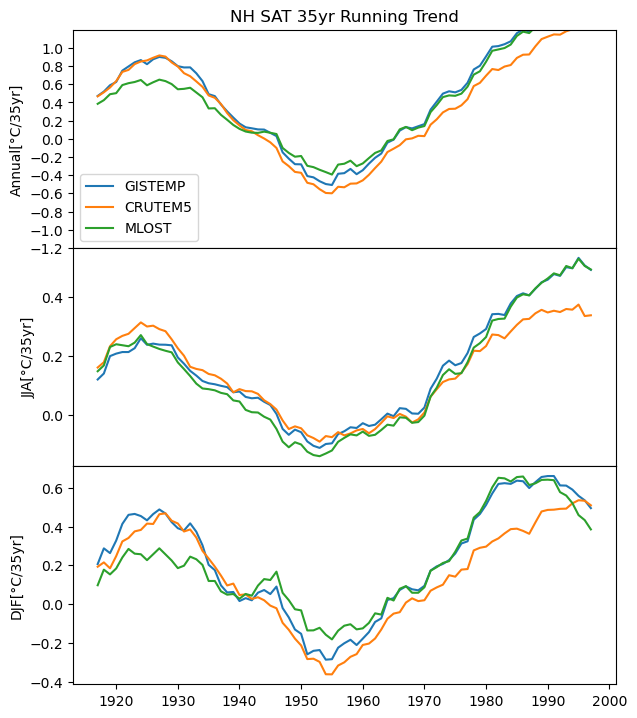

In [44]:
fig,axs = plt.subplots(3,1, figsize=(7,8.5), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)
# plt.style.use('seaborn-bright')
x = np.arange(1917,1998,1)

axs[0].plot(x, trend*35.0, label='GISTEMP')
axs[0].plot(x, trend1*35.0, label='CRUTEM5')
axs[0].plot(x, trend2*35.0, label='MLOST')

axs[0].set_ylabel("Annual[°C/35yr]")
axs[0].set_title('NH SAT 35yr Running Trend')

axs[1].plot(x, trend_JJA*15.0)
axs[1].plot(x, trend1_JJA*15.0)
axs[1].plot(x, trend2_JJA*15.0)
# axs[1].plot(x, tas_GHCNv4_JJA_mean)
axs[1].set_ylabel("JJA[°C/35yr]")
# axs[1].set_title('1900-2014 JJA NH SAT')

axs[0].set_yticks(np.arange(-1.2,1.2, 0.2))
axs[0].set_ylim(-1.2,1.2)

axs[2].plot(x, trend_DJF*15.0)
axs[2].plot(x, trend1_DJF*15.0)
axs[2].plot(x, trend2_DJF*15.0)
# axs[2].plot(x, tas_GHCNv4_DJF_mean)
axs[2].set_ylabel("DJF[°C/35yr]")

# axs[0].legend(loc='upper left', bbox_to_anchor=(1.0, 0.95, 0.15, 0.15))
axs[0].legend()

# axs[2].set_title('1900-2014 DJF NH SAT')

# Temperature vs time plot - illustrates the "x" and "add_legend" kwargs
# air.isel(lon=30, lat=isel_lats).plot.line(ax=ax2, x="time", add_legend=False)
# ax2.set_ylabel("")
# sns.set_context('poster')

# fig.savefig("Obs_NH_15yr_SAT_trend.png")
fig.savefig('/home/m/m301036/josie/LSAT/output-Figures/Obs_NH_35yr_SAT_trend.png', format='png')
plt.show
# fig.tight_layout()


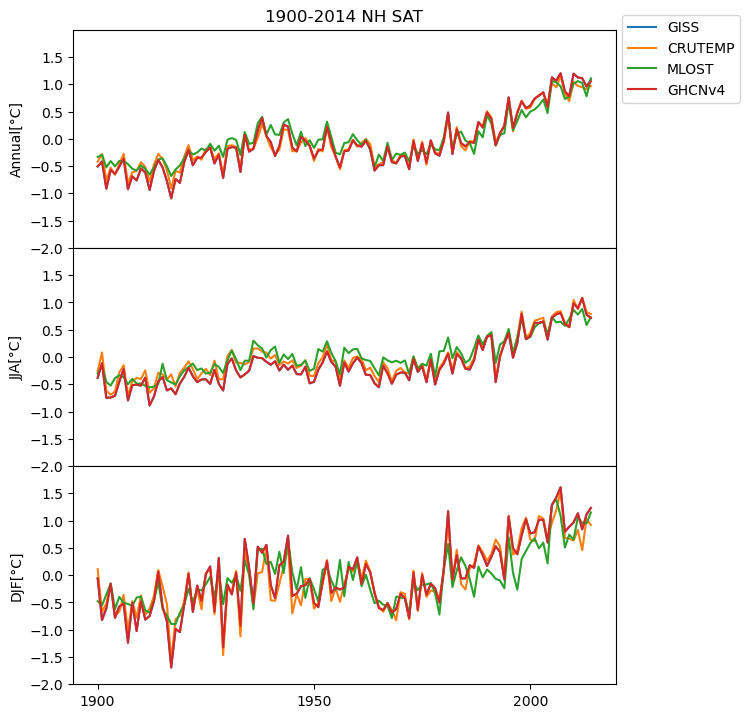

In [46]:
#Plot the annual mean temperature anomalies
# import proplot as pplt
# fig= pplt.figure(share=False, suptitle='Northern Hemisphere mean LSAT anomaly')
# axs = fig.subplots
# Prepare the figure
# fig = plt.figure()
# axs = fig.add_subplot(1,1,1)
fig,axs = plt.subplots(3,1, figsize=(7,8.5), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(year, tas_GISS_annual, label='GISS')
axs[0].plot(year, tas_CRUTEMP_annual, label= 'CRUTEMP')
axs[0].plot(year, tas_MLOST_annual, label='MLOST')
axs[0].plot(year, tas_GHCNv4_annual, label='GHCNv4')

axs[0].set_ylabel("Annual[°C]")
axs[0].set_title('1900-2014 NH SAT')

axs[1].plot(year, tas_GISS_JJA_mean)
axs[1].plot(year, tas_CRUTEMP_JJA_mean)
axs[1].plot(year, tas_MLOST_JJA_mean)
axs[1].plot(year, tas_GHCNv4_JJA_mean)

axs[1].set_ylabel("JJA[°C]")
# axs[1].set_title('1900-2014 JJA NH SAT')

axs[0].set_yticks(np.arange(-2.0,2.0, 0.5))
axs[0].set_ylim(-2.0,2.0)

axs[2].plot(year, tas_GISS_DJF_mean)
axs[2].plot(year, tas_CRUTEMP_DJF_mean)
axs[2].plot(year, tas_MLOST_DJF_mean)
axs[2].plot(year, tas_GHCNv4_DJF_mean)
axs[2].set_ylabel("DJF[°C]")

axs[0].legend(loc='upper left', bbox_to_anchor=(1.0, 0.95, 0.15, 0.15))
# axs[2].set_title('1900-2014 DJF NH SAT')

# Temperature vs time plot - illustrates the "x" and "add_legend" kwargs
# air.isel(lon=30, lat=isel_lats).plot.line(ax=ax2, x="time", add_legend=False)
# ax2.set_ylabel("")
sns.set_context('poster')
# Show
plt.show
# fig.tight_layout()
# plt.savefig(fig, format='eps')
fig.savefig("NH_averaged_SAT_TS_1900-2014.png")